In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋

C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
excercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [5]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [8]:
#Frequency distribution of species"
X = df.drop(['Weight'], axis=1)
y = df['Weight']

In [9]:
X

,Chins,Situps,Jumps,Waist,Pulse
0,5.0,162.0,60.0,36.0,50.0
1,2.0,110.0,60.0,37.0,52.0
2,12.0,101.0,101.0,38.0,58.0
3,12.0,105.0,37.0,35.0,62.0
4,13.0,155.0,58.0,35.0,46.0
5,4.0,101.0,42.0,36.0,56.0
6,8.0,101.0,38.0,38.0,56.0
7,6.0,125.0,40.0,34.0,60.0
8,15.0,200.0,40.0,31.0,74.0
9,17.0,251.0,250.0,33.0,56.0


In [10]:
y

0     191.0
1     189.0
2     193.0
3     162.0
4     189.0
5     182.0
6     211.0
7     167.0
8     176.0
9     154.0
10    169.0
11    166.0
12    154.0
13    247.0
14    193.0
15    202.0
16    176.0
17    157.0
18    156.0
19    138.0
Name: Weight, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [18]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 32275.5664 - mse: 32275.5664 - val_loss: 32696.0508 - val_mse: 32696.0508
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 32216.1602 - mse: 32216.1602 - val_loss: 32656.5508 - val_mse: 32656.5508
Epoch 3/100
1/1 [==============================] - 0s 67ms/step - loss: 32172.9160 - mse: 32172.9160 - val_loss: 32621.9551 - val_mse: 32621.9551
Epoch 4/100
1/1 [==============================] - 0s 66ms/step - loss: 32135.4805 - mse: 32135.4805 - val_loss: 32589.5273 - val_mse: 32589.5273
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 32101.1875 - mse: 32101.1875 - val_loss: 32559.0352 - val_mse: 32559.0352
Epoch 6/100
1/1 [==============================] - 0s 85ms/step - loss: 32068.1211 - mse: 32068.1211 - val_loss: 32530.3535 - val_mse: 32530.3535
Epoch 7/100
1/1 [==============================] - 0s 89ms/step - loss: 32036.1992 - mse: 32036.1992 - val_loss: 32502.8750 - 

Epoch 57/100
1/1 [==============================] - 0s 41ms/step - loss: 29933.2402 - mse: 29933.2402 - val_loss: 30686.7051 - val_mse: 30686.7051
Epoch 58/100
1/1 [==============================] - 0s 39ms/step - loss: 29874.3047 - mse: 29874.3047 - val_loss: 30635.8223 - val_mse: 30635.8223
Epoch 59/100
1/1 [==============================] - 0s 42ms/step - loss: 29814.6016 - mse: 29814.6016 - val_loss: 30584.1426 - val_mse: 30584.1426
Epoch 60/100
1/1 [==============================] - 0s 67ms/step - loss: 29754.0332 - mse: 29754.0332 - val_loss: 30531.8145 - val_mse: 30531.8145
Epoch 61/100
1/1 [==============================] - 0s 72ms/step - loss: 29692.6992 - mse: 29692.6992 - val_loss: 30478.7012 - val_mse: 30478.7012
Epoch 62/100
1/1 [==============================] - 0s 73ms/step - loss: 29630.5527 - mse: 29630.5527 - val_loss: 30424.7910 - val_mse: 30424.7910
Epoch 63/100
1/1 [==============================] - 0s 84ms/step - loss: 29567.5762 - mse: 29567.5762 - val_loss: 3037

In [19]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 27801.8145 - mse: 27801.8145


[27801.814453125, 27801.814453125]

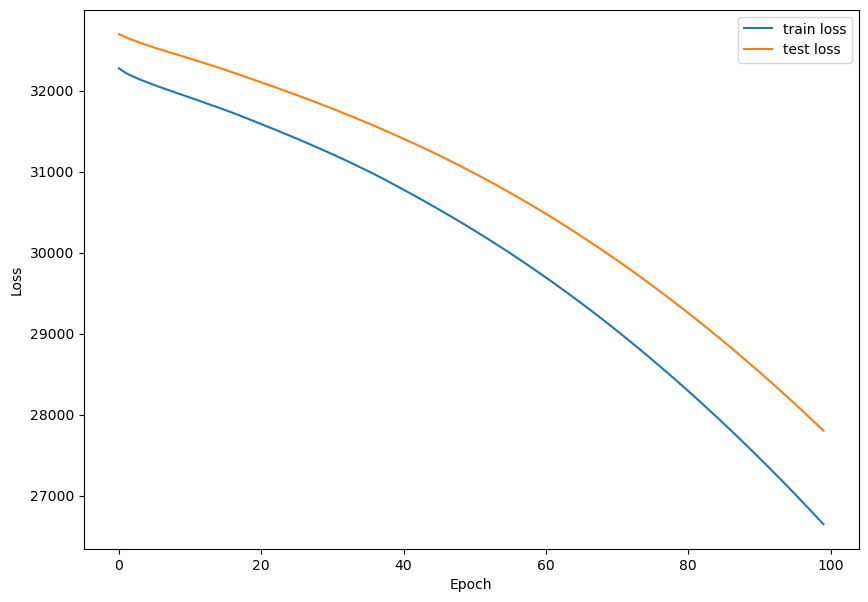

In [20]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

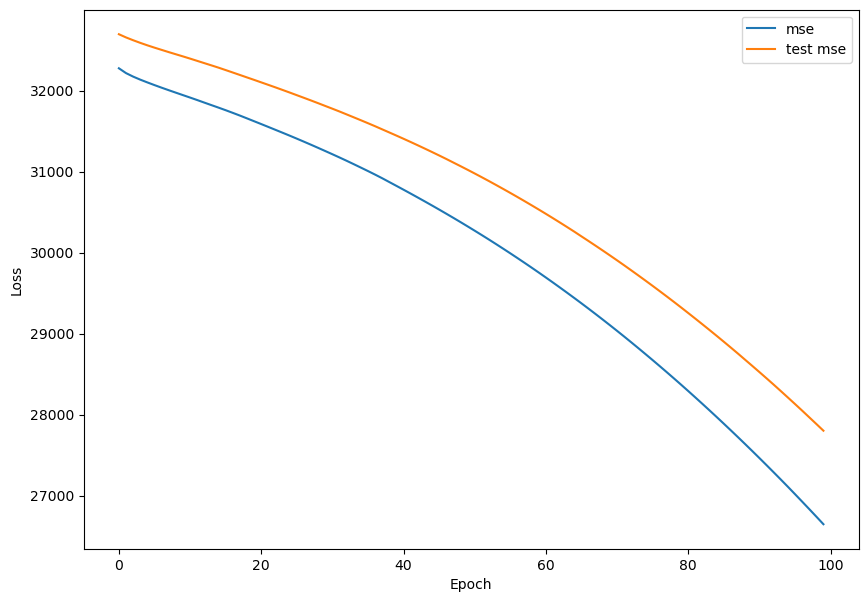

In [21]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()